# Udacity - Communicate Data Findings (Dataset: Loan Data from Prosper)
## by Justin Olgui

## Preliminary Wrangling

This dataset contains data from over 100,000 prosper loans. <br>
Each row contains information about a specific loan that was funded through the Prosper marketplace. <br>

Who is prosper? <br>
Prosper is a San Francisco based company in the peer-to-peer lending marketplace in the United States. Since 2005, Prosper has facilitated more than $15 billion in loans to more than 930,000 people. <br>

What is peer2peer lending? <br>
For those who are not familiar, Prosper does not actually lend money, they essentially provide a marketplace for lenders and borrowers to meet, think online dating for loans. As a prospective borrower, you would go through the process of filling out an application, why do you want money, how much do you make, are you employed and so on. They will then assign you a Prosperscore and put your loan up on their marketplace at which point lenders who are looking for higher rate investment returns can choose to fund a portion, or the entirety of your loan. Some of the information on our borrower includes but is not limited to APR, Employment status, credit rating, term, occupation, etc. 

In [77]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
import matplotlib.dates as mdates
from pandas import TimeGrouper
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Load csv into dataframe
Loan_df = pd.read_csv('prosperLoanData.csv')

In [3]:
# Check to ensure it was read in properly
pd.set_option('display.max_columns', 81)
Loan_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [4]:
#Checking out the structure of our dataset
Loan_df.shape

(113937, 81)

In [5]:
# Checking out the dataset's info
Loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

### What is the structure of your dataset?

This dataset contains 113937 loans with 81 different variables. <br>
Our column definitions can be found in "Prosper Loan Data - Columns Definitions.csv"

### What are the main features of interest in your dataset?

Through our exploration i'm wanting to answer some of the following questions I have:
    
    - Who are the borrowers? (financial health, income levels, debt ratios, etc.)
    - Why are they borrowing money?
    - How much are they paying in interest?
    - Are these metrics changing over time?
    
My objective is to better understand borrower behavior, what are their needs and why are they choosing p2p lending.

### What features in the dataset do you think will help support your investigation into your features of interest?

This dataset is filled with a ton of personal information on our borrowers. Some of the standard finance metrics are quite helpful on their own. (DebtToIncomeRatio, CreditGrade, StatedMonthlyIncome, RevolvingCreditBalance, BorrowerAPR, etc.) However by combining these variables I think we should be able to gather some interesting insights and better understanding our borrowers.

In [6]:
''' 
I'll begin by creating a new column CreditScoreMean.
This column will be the mean of CreditScoreRangeLower and CreditScoreRangeUpper.
The purpose is to reduce the total number of variables i'm using in my analysis.
'''
Loan_df['CreditScoreMean'] = Loan_df[['CreditScoreRangeLower', 'CreditScoreRangeUpper']].mean(axis=1)

In [7]:
# We'll now condense our dataset as it is not feasible to use all 81 variables
Condensed_prosper = Loan_df[['ListingCreationDate', 'CreditScoreMean', 'ProsperScore', 'Term', 'MonthlyLoanPayment', \
                             'StatedMonthlyIncome', 'BorrowerAPR', 'DebtToIncomeRatio','RevolvingCreditBalance', \
                             'BorrowerState', 'ListingCategory (numeric)']]                           
                            

# Variable Defintions

Taken from our Prosper Loan Data - Columns Definitions.csv that was provided with the dataset I will now define the individual variables i have selected for my analysis:

__CreditScoreMean:__ This column is the mean of CreditScoreRangeLower and CreditScoreRangeUpper.<br>

__ProsperScore:__ A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.<br>

__Term:__ The length of the loan expressed in months.<br>

__MonthlyLoanPayment:__ The scheduled monthly loan payment.<br>

__StatedMonthlyIncome:__ The monthly income the borrower stated at the time the listing was created.<br>

__BorrowerAPR:__ The Borrower's Annual Percentage Rate (APR) for the loan.<br>

__DebtToIncomeRatio:__ The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).<br>

__RevolvingCreditBalance:__ Dollars of revolving credit at the time the credit profile was pulled.<br>

__BorrowerState:__ The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.<br>

__ListingCategory:__ Determines the category of loan that the borrower needs money for.<br>

## Univariate Exploration

We'll begin our analysis by plotting distributions for each of our individual variables we have selected. Each variable helps us to better understand one aspect of our individual borrowers. Plotting a distribution will give us insights into the group as a whole.

In [8]:
#We'll check to see we got all the right information
Condensed_prosper.head()

,ListingCreationDate,CreditScoreMean,ProsperScore,Term,MonthlyLoanPayment,StatedMonthlyIncome,BorrowerAPR,DebtToIncomeRatio,RevolvingCreditBalance,BorrowerState,ListingCategory (numeric)
0,2007-08-26 19:09:29.263000000,649.5,NaN,36,330.43,3083.333333,0.16516,0.17,0.0,CO,0
1,2014-02-27 08:28:07.900000000,689.5,7.0,36,318.93,6125.000000,0.12016,0.18,3989.0,CO,2
2,2007-01-05 15:00:47.090000000,489.5,NaN,36,123.32,2083.333333,0.28269,0.06,NaN,GA,0
3,2012-10-22 11:02:35.010000000,809.5,9.0,36,321.45,2875.000000,0.12528,0.15,1444.0,GA,16
4,2013-09-14 18:38:39.097000000,689.5,4.0,36,563.97,9583.333333,0.24614,0.26,6193.0,MN,2


In [9]:
# calling info to review our columns
Condensed_prosper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 11 columns):
ListingCreationDate          113937 non-null object
CreditScoreMean              113346 non-null float64
ProsperScore                 84853 non-null float64
Term                         113937 non-null int64
MonthlyLoanPayment           113937 non-null float64
StatedMonthlyIncome          113937 non-null float64
BorrowerAPR                  113912 non-null float64
DebtToIncomeRatio            105383 non-null float64
RevolvingCreditBalance       106333 non-null float64
BorrowerState                108422 non-null object
ListingCategory (numeric)    113937 non-null int64
dtypes: float64(7), int64(2), object(2)
memory usage: 9.6+ MB


In [10]:
#convert to datetime
Condensed_prosper['ListingCreationDate'] = pd.to_datetime(Condensed_prosper.ListingCreationDate)

In [80]:
# Create a new series and then convert to Quarters
quarters = pd.Series(Condensed_prosper['ListingCreationDate'])
quarters = pd.PeriodIndex(quarters, freq='Q')

In [12]:
# Add a new column to our DF
Condensed_prosper['Quarters'] = quarters

In [13]:
# Grab the unique values in our quarters column
quarters = Condensed_prosper['Quarters'].unique()

In [14]:
# Sort our list in chronological order
quarters = sorted(quarters)

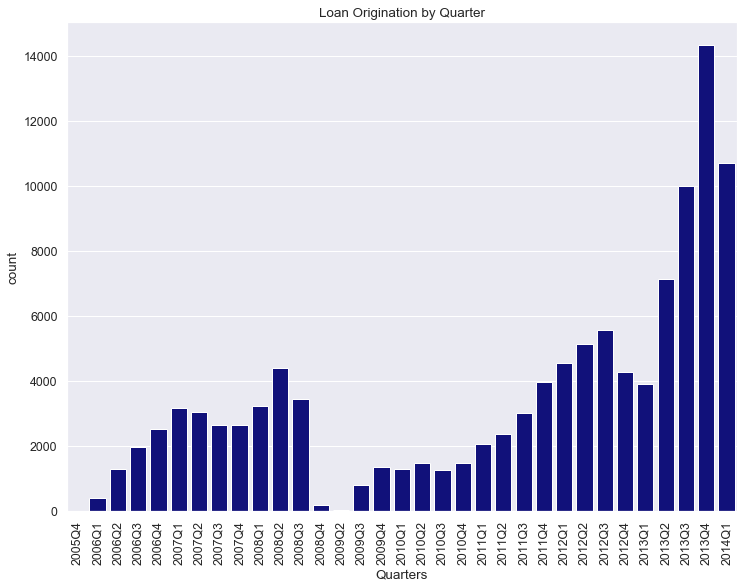

In [15]:
#Draw our distribution
plt.figure(figsize=(12, 9))
sb.set(style="darkgrid")
sb.set(font_scale=1.12)
sb.countplot(x='Quarters', data=Condensed_prosper, color="darkblue", order=quarters);
plt.xticks(rotation=90);
plt.title('Loan Origination by Quarter');

The first thing that jumps out to me is that at Q3 of 2008 prosper loans essentially fell off a cliff. The timing is peculiar because this is when the economic crisis of 2008 came to light, this was no coincidence. Prosper was clearly hit hard by this economic downturn. Since then Prosper has experienced some serious growth. Aside from the Q4 2012 and the Q1 2013 prosper loans have increased quarter over quarter since 2010 at what appears to be a parabolic rate. Let's now inspect the credit worthiness of our borrowers.

In [16]:
# Let's use describe to determine what will be the best bin sizes
Condensed_prosper['CreditScoreMean'].describe()

count    113346.000000
mean        695.067731
std          66.458275
min           9.500000
25%         669.500000
50%         689.500000
75%         729.500000
max         889.500000
Name: CreditScoreMean, dtype: float64

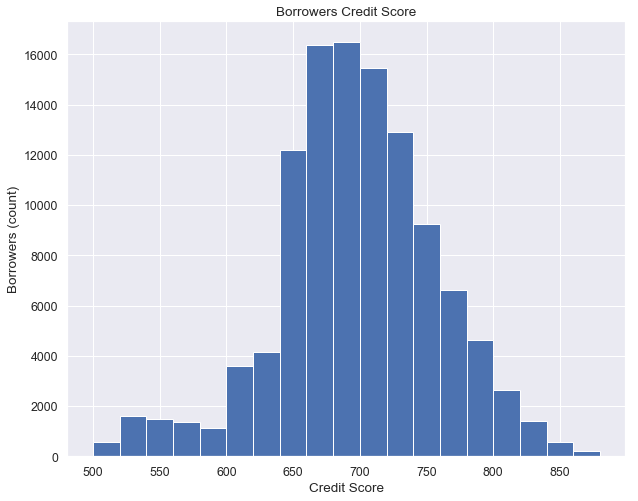

In [17]:
#Plotting our distribution for CreditScoreMean
bins =np.arange(500, 900, 20)
plt.figure(figsize=(10, 8))
plt.hist(data = Condensed_prosper, x = 'CreditScoreMean', bins=bins);
plt.title('Borrowers Credit Score');
plt.xlabel('Credit Score')
plt.ylabel('Borrowers (count)');

This plot is for the most part normally distributed with the majority of borrowers having a credit score between 650 and 750. Our mode falls just below the 700 mark. According to Experian which is one of the credit report agencies in the US: "a credit score of 700 or above is generally considered good. A score of 800 or above on the same range is considered to be excellent. Most credit scores fall between 600 and 750." We actually have very few in the 600-650 range. I think it's fair to say that our borrowers are slightly above average. Credit score has long been considered the gold standard in determining a borrower's credit worthiness. Let's see how this compares to the relatively new prosper score.

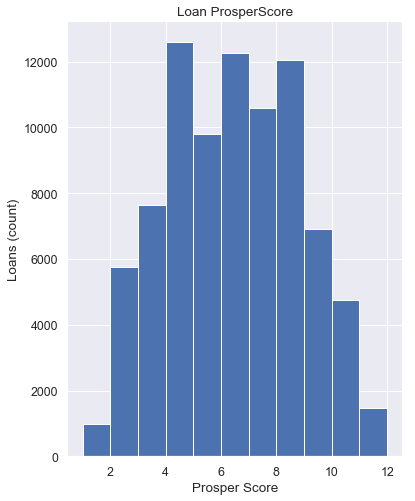

In [18]:
bar#Plotting our distribution for ProsperScore
bins =np.arange(1, 13, 1)
plt.figure(figsize=(6, 8))
plt.hist(data = Condensed_prosper, x = 'ProsperScore', bins=bins);
plt.title("Loan ProsperScore");
plt.xlabel('Prosper Score')
plt.ylabel('Loans (count)');

This prosperscore is quite interesting, our mode is a 4 which is quite low. This indicates that most loans are considered to be high risk. This is telling us a very different story from our credit rating. Let's have a look at our Term variable to see how long most loans are. 

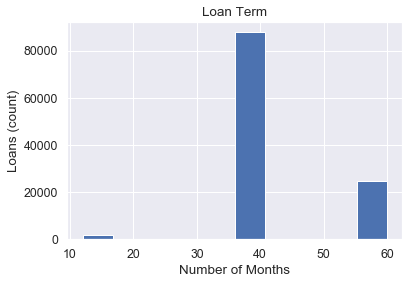

In [19]:
# Using Hist to plot our distribution for term
plt.hist(data = Condensed_prosper, x = 'Term');
plt.title('Loan Term')
plt.xlabel('Number of Months')
plt.ylabel('Loans (count)');

Prosper loans are given in 12, 36 and 60 month terms. It's clear that the majority of our borrowers are opting for a 36 month term. We shall now have a look at what the typical interest rate of a prosper loan is.

In [20]:
# Let's use describe so we can find out what might be the best choice for our bins
Condensed_prosper['MonthlyLoanPayment'].describe()

count    113937.000000
mean        272.475783
std         192.697812
min           0.000000
25%         131.620000
50%         217.740000
75%         371.580000
max        2251.510000
Name: MonthlyLoanPayment, dtype: float64

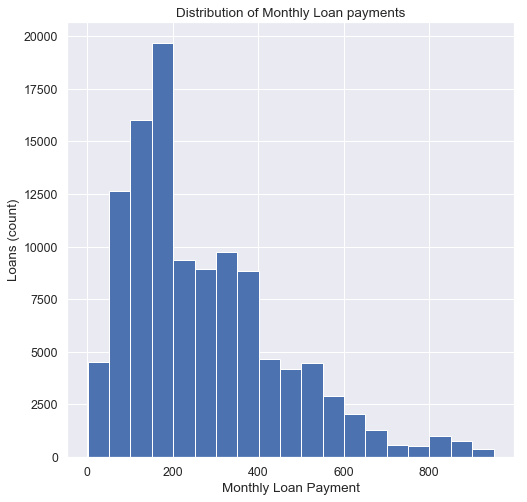

In [21]:
# Using Hist to plot our distribution for MonthlyLoanPayment
bins = np.arange(1, 1000, 50)
plt.figure(figsize=(8, 8))
plt.hist(data = Condensed_prosper, x = 'MonthlyLoanPayment', bins=bins);
plt.title('Distribution of Monthly Loan payments')
plt.xlabel('Monthly Loan Payment')
plt.ylabel('Loans (count)');

The majority of prosper loans monthly payments are below 400, with the highest frequency falling between 150-200. Depending on what other debts a borrower may have these payment amount seem to be quite sustainable and shouldn't have too much of an impact on a borrower's ability to repay. To better understand the impact these payments might have it seems reasonable to next understand the income levels of our borrowers.

In [22]:
# Once again using describe to determine appropriate bins
Condensed_prosper['StatedMonthlyIncome'].describe()

count    1.139370e+05
mean     5.608026e+03
std      7.478497e+03
min      0.000000e+00
25%      3.200333e+03
50%      4.666667e+03
75%      6.825000e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

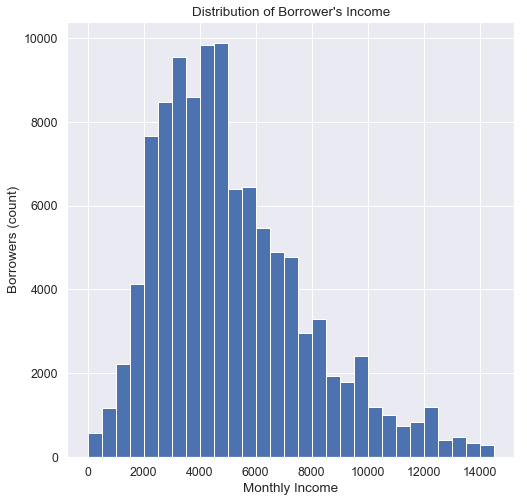

In [23]:
# Using Hist to plot our distribution for StatedMonthlyIncome
bins = np.arange(1, 15000, 500)
plt.figure(figsize=(8, 8))
plt.hist(data = Condensed_prosper, x = 'StatedMonthlyIncome',bins=bins)
plt.title("Distribution of Borrower's Income")
plt.xlabel('Monthly Income')
plt.ylabel('Borrowers (count)');

It appears as thouugh most of our borrowers have a monthly income of roughly 5,000. This distribution is right skewed with some long tails. Kind of interesting that some of our borrowers have a monthly income over 10K and are choosing to turn towards the P2P lending market. This is self reported income though so who knows how accurate this is. Considering most of the monthly loan payments are around 300 this shouldn't put too much stress on our borrowers. However without knowing what other expenses a borrower has it's hard to make this claim with any certainty. Next I'd like to explore APR to see how much interest our borrowers are paying. 

In [24]:
#Let's use describe to see how we may place our bins.
Condensed_prosper['BorrowerAPR'].describe()

count    113912.000000
mean          0.218828
std           0.080364
min           0.006530
25%           0.156290
50%           0.209760
75%           0.283810
max           0.512290
Name: BorrowerAPR, dtype: float64

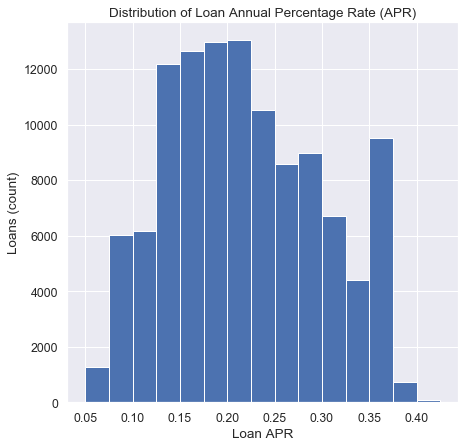

In [25]:
# Using Hist to plot our distribution for APR
bins = np.arange(0.05, 0.45, 0.025)
plt.figure(figsize=(7, 7))
plt.hist(data = Condensed_prosper, x = 'BorrowerAPR', bins=bins)
plt.title('Distribution of Loan Annual Percentage Rate (APR)')
plt.xlabel('Loan APR')
plt.ylabel('Loans (count)');

Our distribution here is almost normally distributed, however it does have a slight right skew. With a large amount of loans in the 0.35 - 0.375 range. The mode is between 0.2 - 0.25, our borrowers must be pretty desperate to accept these loans. These rates are worse than pretty much every credit card there is on the market. A loan with an APR above 0.35 is pretty much usury. Let's have a look at their debt to income ratio to see if we can better understand the financial situation of our borrowers. 

In [26]:
#Let's use describe to see how we may place our bins.
Condensed_prosper['DebtToIncomeRatio'].describe()

count    105383.000000
mean          0.275947
std           0.551759
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

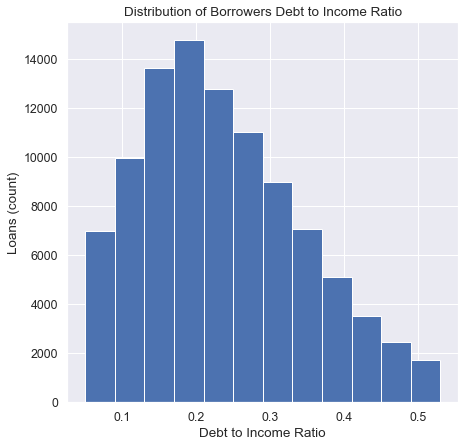

In [27]:
# Using Hist to plot our distribution for DebtToIncomeRatio
bins = np.arange(0.05, 0.55, 0.04)
plt.figure(figsize=(7, 7))
plt.hist(data = Condensed_prosper, x = 'DebtToIncomeRatio', bins=bins)
plt.title('Distribution of Borrowers Debt to Income Ratio')
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Loans (count)');

This distribution is once again right skewed like the last few we have explored. This is quite surprising to be honest. Based on standard finance metrics the majority of these people seem to be in pretty good financial health. Typically if you have a DTI below 0.36 it's considered to be quite good. The mode of our distribution is below 0.2, I'm quite curious to know why these people are turning to the P2P markets. Could this be the result of strict lending criteria, a lack of financial literacy or is the typical loan approval process just too onerous for our borrowers? Next let's explore how much are these borrowers carrying in revolving balances.

In [28]:
#Using describe to better determine bin placement
Condensed_prosper['RevolvingCreditBalance'].describe()

count    1.063330e+05
mean     1.759871e+04
std      3.293640e+04
min      0.000000e+00
25%      3.121000e+03
50%      8.549000e+03
75%      1.952100e+04
max      1.435667e+06
Name: RevolvingCreditBalance, dtype: float64

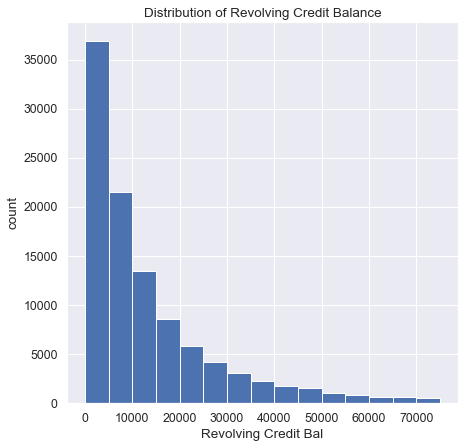

In [29]:
# Using Hist to plot our distribution for APR
bins = np.arange(0, 80000, 5000)
plt.figure(figsize=(7, 7))
plt.hist(data = Condensed_prosper, x = 'RevolvingCreditBalance', bins=bins)
plt.title('Distribution of Revolving Credit Balance')
plt.xlabel('Revolving Credit Bal')
plt.ylabel('count');

Once again, yet another heavily right skewed distribution. It appears as though most of our borrowers have less than 5,000 in revolving credit balances. This data is counterintuitive, our borrowers seem to be in a pretty good financial situation, and pretty well safeguarded against a financial disaster. Let's find out where our borrowers are located.

In [30]:
#Grab the top 20 states where our borrowers are located in from our dataset
State = Condensed_prosper['BorrowerState'].value_counts()[:20]

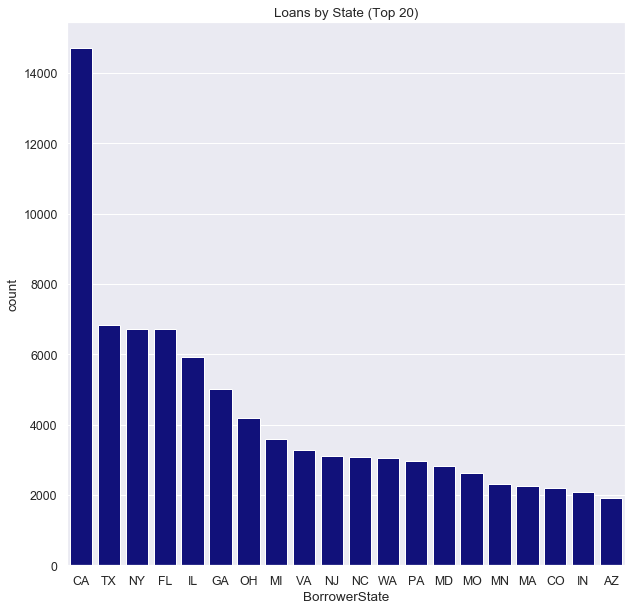

In [31]:
#Drawing our distribution for ProsperScore
plt.figure(figsize=(10, 10))
sb.set(style="darkgrid")
sb.set(font_scale=1.12)
sb.countplot(x='BorrowerState', data=Condensed_prosper, color="darkblue",order=Condensed_prosper['BorrowerState'].value_counts().iloc[:20].index);
plt.title('Loans by State (Top 20)');


It appears as though the majority of our borrowers hail from California, Texas, New York and Florida. This seems to coincide with the fact that these are some of the most densely populated states in the US. The last variable I would like to explore is the Listing Category to better understand why our borrowers are tsking out loans.

In [32]:
# Rename column to Listing Category and change to string
Condensed_prosper.rename(columns={'ListingCategory (numeric)': 'ListingCategory'}, inplace=True)
Condensed_prosper['ListingCategory'] = Condensed_prosper['ListingCategory'].astype('str')

In [33]:
# Replace our numerical categories with their appropriate definitions then convert the data type to categorical
cat_names = {'0': 'Not Available', '1': 'Debt Consolidation', '2': 'Home Improvement', '3': 'Business', '4': 'Personal Loan', '5': 'Student Use', '6': 'Auto', '7': 'Other', '8': 'Baby&Adoption', '9': 'Boat', '10': 'Cosmetic Procedure', '11': 'Engagement Ring', '12': 'Green Loans', '13': 'Household Expenses', '14': 'Large Purchases', '15': 'Medical/Dental', '16': 'Motorcycle', '17': 'RV', '18': 'Taxes', '19': 'Vacation', '20': 'Wedding Loans'}
Condensed_prosper['ListingCategory'].replace(cat_names, inplace=True)
Condensed_prosper['ListingCategory'] = Condensed_prosper['ListingCategory'].astype('category')

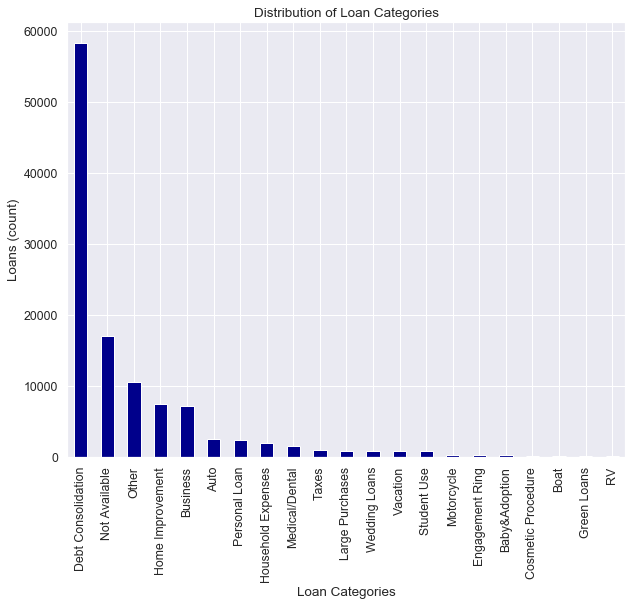

In [34]:
# Plot our loan category distribution 
plt.figure(figsize=(10, 8))
pd.value_counts(Condensed_prosper['ListingCategory']).plot.bar(color='darkblue');
plt.title('Distribution of Loan Categories');
plt.xlabel('Loan Categories')
plt.ylabel('Loans (count)');

This chart just further confuses me, debt consolidation is more than 3 times the count of the next category. Unfortunately the next two are NA and Other which doesn't really provide us with much value. This chart in isolation looks good because you have people actively taking steps to improve their financial situation. On the other hand with a mean APR of nearly 22% you have to wonder what types of loans could they possibly be consolidating that would have a rate higher than that.

### Discuss the distributions of your variables of interest. Were there any unusual points? Did you need to perform any transformations?

I found the exploration quite insightful, as I started my analysis I was quite confused as sone of the data points seem to be telling completely different stories. Once I got to the APR distribution I started to believe that these borrowers must be in severe financial trouble. However most of the other data showed otherwise, they had slightly above average credit scores, very good debt to income ratios and minimal revolving credit balances. They also seem quite financially responsible as they are being proactive in trying to improve their financial situations by opting to consolidate their debt. However with a mean APR of 21.8% these borrowers must have taken on some really bad loans in the past. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

For the most part the dataset was quite clean and tidy so it required very little modifications from me. I did however add a Quarters column to group Listing dates by Quarter. I also created a new Credit Score column that is the mean of the Upper and Lower Credit Score range columns that were initially provided. Finally, I converted the Listing Category column to a categorical datatype and swapped out the numerical value they were given with the definition provided.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

We'll now move into some Bivariate Exploration to better understand some of the relationships that our variables possess.

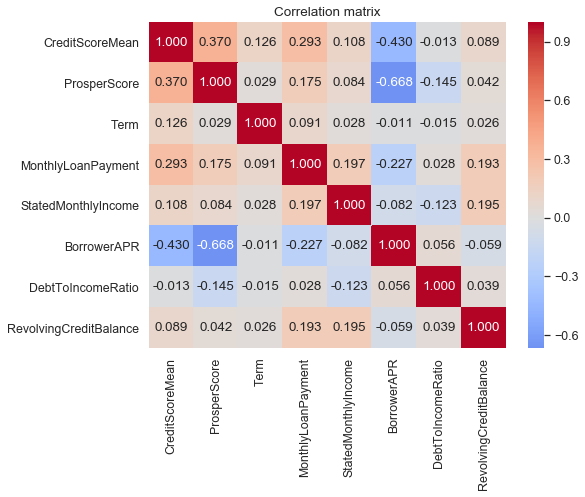

In [35]:
#we'll use our correlation matrix to determine if there are any variables that are highly correlated

plt.figure(figsize = [8,6])
sb.heatmap(Condensed_prosper.corr(), annot = True, fmt = '.3f', cmap = 'coolwarm', center = 0)
plt.title('Correlation matrix');

BorrowerAPR and CreditScoreMean seem to be negatively correlated. BorrowerAPR and ProsperScore also seem to be negatively correlated. We'll dive deeper into those relationship to see what else we can find.

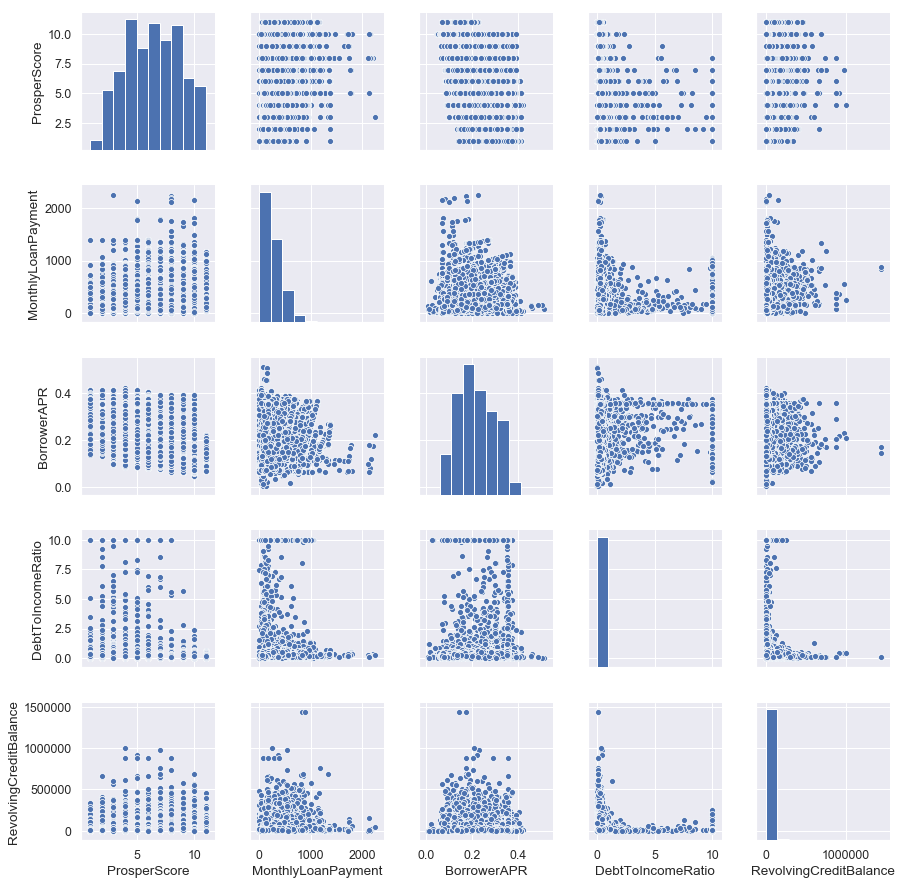

In [36]:
# We'll use pairplot to see relationships amongst numerical variables
g = sb.pairplot(Condensed_prosper[['ProsperScore', 'MonthlyLoanPayment', 'BorrowerAPR', 'DebtToIncomeRatio', 'RevolvingCreditBalance']])

There doesn't seem to be any trends that are super obvious to me. Borrower APR seems to have an odd relationship to Debt to income ratio that may be worth exploring further. We'll first explore the negative correlations we identified in our correlation matrix before coming back to our data identified in our scatter matrix

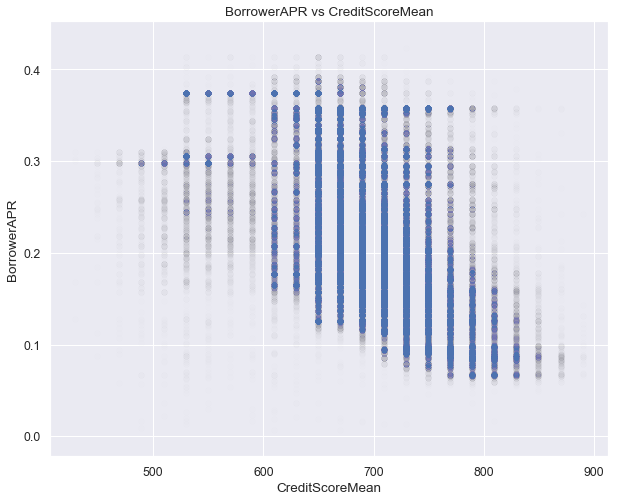

In [115]:
# remove outliers from credit score
cred = Condensed_prosper[Condensed_prosper.CreditScoreMean > 400]
# Scatter plot to show relationship between Creditscore and APR
plt.figure(figsize = [10,8])
plt.scatter('CreditScoreMean', 'BorrowerAPR', data=cred, alpha = 0.003);
plt.title('BorrowerAPR vs CreditScoreMean');
plt.xlabel('CreditScoreMean')
plt.ylabel('BorrowerAPR');

By adding alpha to our plot the relationship starts to become much more clear. There is a negative correlation between credit score and APR. In other words as your credit score increases, your interest rate decreases. This of course is what we would expect. This is a reflection of the inherent risk in lending money, as a borrower demonstrates less risky tendencies, lenders are willing to give the borrower preferred rates.

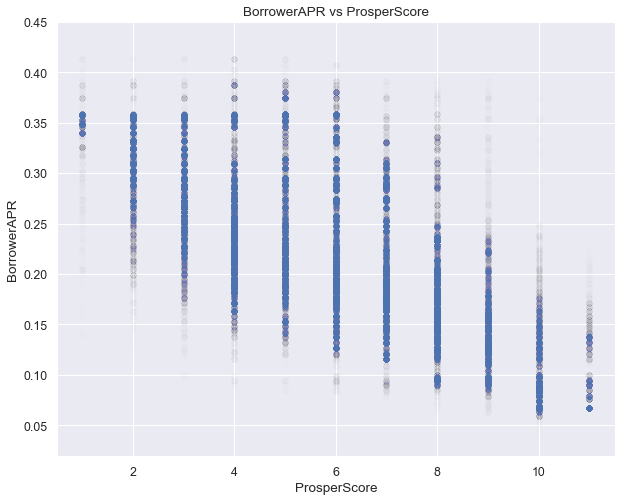

In [114]:
# Scatter plot to show relationship between Creditscore and APR
plt.figure(figsize = [10,8])
plt.scatter('ProsperScore', 'BorrowerAPR', data=Condensed_prosper, alpha = 0.003);
plt.title('BorrowerAPR vs ProsperScore');
plt.xlabel('ProsperScore')
plt.ylabel('BorrowerAPR');

This plot shows us a very similar picture to our credit score plot, which of course is to be expected. Higher prosper score equals lower rates. 

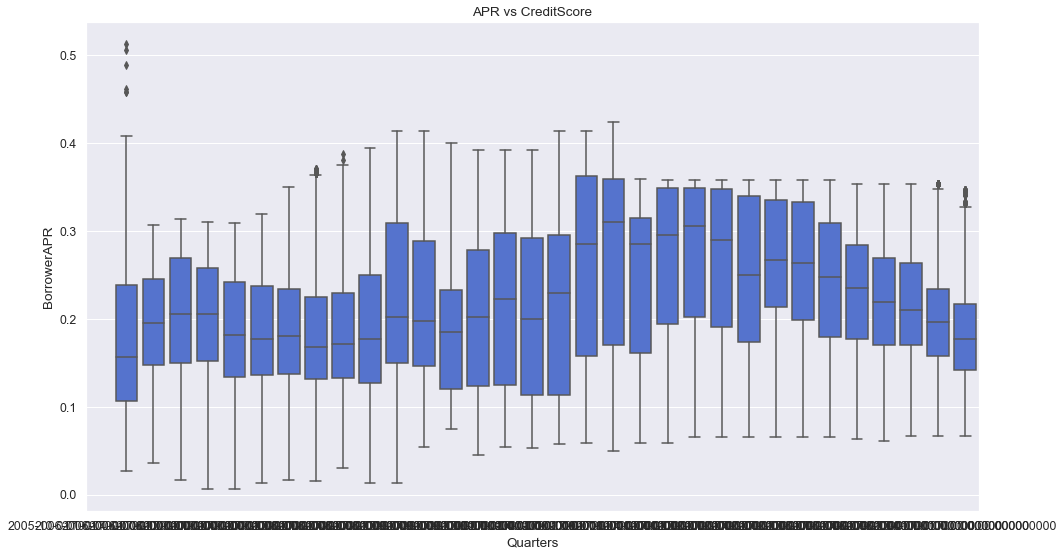

In [61]:
#use boxplot to further investigate APR vs Credit Score
plt.figure(figsize = [16,9])
sb.boxplot(x = 'Quarters', y='BorrowerAPR', data = Condensed_prosper, color = "royalblue");
plt.title('APR vs CreditScore');

In [ ]:
#use boxplot to further investigate APR vs Credit Score
plt.figure(figsize = [16,9])
sb.boxplot(x = 'Quarters', y='BorrowerAPR', data = Condensed_prosper, color = "royalblue");
plt.title('APR vs CreditScore');

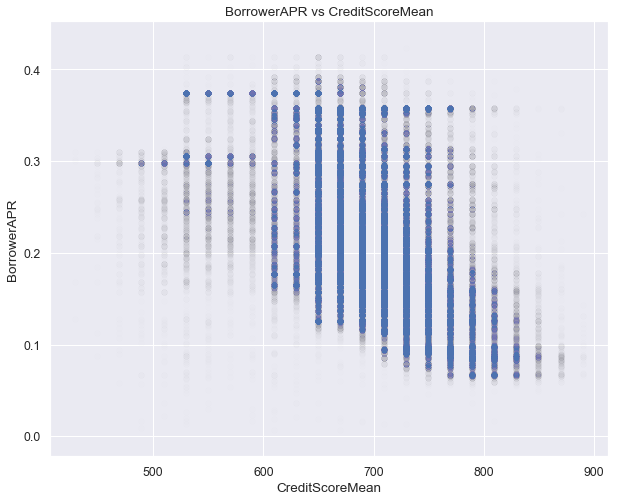

By adding alpha to our plot the relationship starts to become much more clear. There is a negative correlation between credit score and APR. In other words as your credit score increases, your interest rate decreases. This of course is what we would expect. This is a reflection of the inherent risk in lending money, as a borrower demonstrates less risky tendencies, lenders are willing to give the borrower preferred rates.

In [ ]:
 Borrower APR seems to have an odd relationship to Debt to income ratio
    
    BorrowerAPR and CreditScoreMean

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!